In [1]:
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

import pandas as pd            #for DataFrame and analysis
import numpy as np
import geopandas as gpd        #for mapping and spatial aggregation

import matplotlib.pyplot as plt  #use matplotlib to modify the plots (e.g. make them larger) 
import seaborn as sb             #for data viz
import palettable.colorbrewer.sequential as pcs #for choropleth maps
import libpysal as lps
import statsmodels.formula.api as smf  #for regression
import scipy.stats as ss 
import pysal as ps
from pysal.model import spreg
from spreg import ols
from spreg import ML_Error
from spreg import ML_Lag

import os
import urllib
import zipfile
import sys
from libpysal.weights import Queen, Rook
import pysal.viz as viz
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
import networkx as nx

In [2]:
sm = pd.read_csv("C:/Users/samue/OneDrive - King's College London/Desktop/KCL Y3/Dissertation/1 Datasets/Python/Supermarket (All).csv") 

In [3]:
pwc = pd.read_csv("C:/Users/samue/OneDrive - King's College London/Desktop/KCL Y3/Dissertation/1 Datasets/Python/LSOA PWC.csv")

In [4]:
df = pd.read_csv("C:/Users/samue/OneDrive - King's College London/Desktop/KCL Y3/Dissertation/1 Datasets/Python/Master (LSOA).csv", encoding= "unicode_escape") 

In [5]:
#creating geometry column in sm
#reproject to BNG

smgdf = gpd.GeoDataFrame(
    sm, geometry=gpd.points_from_xy(sm.X, sm.Y))
CRS = {'init': 'epsg:27700'}

smgdf = gpd.GeoDataFrame(smgdf, crs=CRS)


In [6]:
lsoa = gpd.read_file("C:/Users/samue/OneDrive - King's College London/Desktop/KCL Y3/Dissertation/1 Datasets/Python/LSOA.shp")

In [7]:
lsoa = lsoa.to_crs ({'init':'epsg:27700'})

In [4]:
#slicing SM data
sm1 = sm[(sm["LAD"]== "Enfield")]

In [5]:
sm1

,c,id,Tier,retailer,postcode,LAD,X,Y,LSOA11CD,LSOA11NM,LAD21CD,LAD21NM,Unnamed: 12,Unnamed: 13
263,979,1010015923,Budget,Iceland,EN2 6TR,Enfield,532720.7832,196485.1540,E01001450,Enfield 015C,E09000010,Enfield,NaN,E01000271
268,984,1010007080,Budget,Lidl,EN2 6TR,Enfield,532873.1724,196374.5712,E01001450,Enfield 015C,E09000010,Enfield,NaN,E01000174
273,989,1010007229,Budget,Lidl,N18 2XZ,Enfield,534056.5127,192377.7986,E01001558,Enfield 033E,E09000010,Enfield,NaN,E01004653
285,1001,1010012790,Budget,Aldi,EN1 1TH,Enfield,534527.4227,196863.3586,E01001513,Enfield 012F,E09000010,Enfield,NaN,E01002883
291,1007,1010000913,Budget,Asda,N14 5PW,Enfield,529425.6526,194491.8186,E01001519,Enfield 020D,E09000003,Barnet,NaN,E01002835
292,1008,1010010905,Budget,Iceland,N9 0HW,Enfield,534639.2727,193663.0086,E01001429,Enfield 030D,E09000010,Enfield,NaN,E01004609
293,1009,1010007232,Budget,Lidl,N9 0TY,Enfield,534404.2127,193529.5886,E01001429,Enfield 030D,E09000010,Enfield,NaN,E01001953
295,1011,1010014120,Budget,Lidl,EN3 6PS,Enfield,535533.6009,198833.9504,E01001547,Enfield 002C,E09000010,Enfield,NaN,E01001857
296,1012,1010000992,Budget,Asda,EN3 4EF,Enfield,535313.0027,195442.7286,E01001502,Enfield 018D,E09000010,Enfield,NaN,E01002820
298,1014,1010000734,Budget,Asda,N9 0AL,Enfield,534423.7227,193301.8386,E01001429,Enfield 030D,E09000010,Enfield,NaN,E01004652


In [6]:
pwc.columns.values

array(['X', 'Y', 'objectid', 'lsoa11cd', 'lsoa11nm', 'LAD', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], dtype=object)

In [7]:
#slicing PWC data
pwc1 = pwc[(pwc["LAD"]== "Enfield")]

In [8]:
# configure the place , network type , trip times , and travel speed
place_name = "London Borough of Enfield, London, England"
network_type = 'drive'

In [9]:
G = ox.graph.graph_from_place (place_name, network_type=network_type)

In [10]:
# project the network to the same CRS
G = ox.projection.project_graph (G, to_crs ={'init':'epsg:27700'})
gdf_nodes = ox.utils_graph.graph_to_gdfs (G, edges = False)

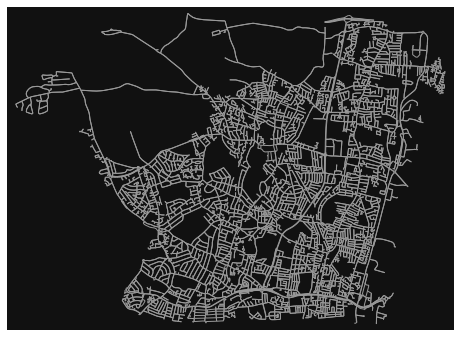

In [11]:
fig, ax = ox.plot.plot_graph(G, figsize=(8,8), node_size=0)

In [12]:
orig_df = pwc1[["lsoa11cd", "lsoa11nm", "X", "Y"]]

In [13]:
dest_df = sm1[["Tier", "retailer", "X", "Y"]]

In [14]:
# OPTION 2: use a strongly (instead of weakly) connected graph
Gs = ox.utils_graph.get_largest_component(G, strongly=True)

In [15]:
def nearest_node(row):
   return ox.get_nearest_node(Gs, (row.Y, row.X))

orig_df['orig_node'] = orig_df.apply(nearest_node, axis=1)  # axis=1 means do row-wise calculations (not column-wise)

orig_df

,lsoa11cd,lsoa11nm,X,Y,orig_node
42,E01001426,Enfield 030B,534645.379,192979.298,25420606
43,E01001427,Enfield 030C,534845.194,192503.048,689963252
44,E01001424,Enfield 030A,534137.000,193417.697,26002021
45,E01001425,Enfield 027B,534060.738,192836.942,689963398
46,E01001422,Enfield 011D,526305.730,197827.742,19192366
...,...,...,...,...,...
4757,E01001553,Enfield 037B,532910.443,191850.729,25549935
4760,E01001485,Enfield 025B,534685.743,193798.586,251879817
4775,E01001531,Enfield 028B,530499.904,193598.495,7727529333
4814,E01001521,Enfield 028A,529791.295,193818.760,8674360798


In [990]:
def nearest_node(row):
   return ox.get_nearest_node(Gs, (row.Y, row.X))

dest_df['dest_node'] = dest_df.apply(nearest_node, axis=1)  # axis=1 means do row-wise calculations (not column-wise)

dest_df

,Tier,retailer,X,Y,dest_node
624,Mid,Tesco,533536.8626,181260.5385,6110164647
627,Mid,Sainsburys,531670.1126,180983.6885,5177397824
629,Mid,Sainsburys,532344.4726,180968.8385,1938819320
642,Mid,Sainsburys,533239.0026,180936.5785,1547013704
647,Mid,Tesco,532146.2526,181316.2285,20965797
657,Mid,Tesco,531628.7026,181008.3185,4367041962
660,Mid,Tesco,532957.4626,181313.0885,250549587
661,Mid,Sainsburys,533022.5326,181142.3385,107587
666,Mid,Tesco,532987.0026,180809.9985,107627
669,Mid,Tesco,533290.7226,181556.5585,3673602988


In [606]:
orig_list = []
dest_list = []

for o in orig_df.orig_node:
    for d in dest_df.dest_node:
        orig_list.append(o)
        dest_list.append(d)

all_ods = pd.DataFrame({'o_node': orig_list, 'd_node': dest_list})

all_ods

,o_node,d_node
0,2472018646,1569016999
1,2472018646,101899
2,2472018646,1569016984
3,2472018646,2833955766
4,2472018646,25468948
...,...,...
9571,772159872,26618344
9572,772159872,2213538538
9573,772159872,107895
9574,772159872,110105


In [607]:
def distance(row):
    return nx.shortest_path_length(Gs, source=row.o_node, target=row.d_node, weight='length')

all_ods['dist'] = all_ods.apply(distance, axis=1)

all_ods

,o_node,d_node,dist
0,2472018646,1569016999,1297.585
1,2472018646,101899,833.116
2,2472018646,1569016984,1285.406
3,2472018646,2833955766,5113.007
4,2472018646,25468948,3522.700
...,...,...,...
9571,772159872,26618344,1252.154
9572,772159872,2213538538,2674.873
9573,772159872,107895,3662.714
9574,772159872,110105,3112.666


In [608]:
#Sorting to find nearest supermarket
df = all_ods.sort_values(by='dist', ascending=True)
df = df.drop_duplicates(subset='o_node', keep="first")

In [609]:
df.to_csv('Richmond upon Thames.csv')

In [16]:
orig_df.to_csv("Enfield Orig NodeCoordinates.csv")

In [991]:
#for matching of coordinates to origin node points
dest_df.to_csv('City of London supermarket.csv')